In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [189]:
df=pd.read_csv(r"R:\DataScience_Aug_2025\DeepLearning\Artifacts\iris.csv")
df=pd.DataFrame(df)

In [190]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [191]:
df.shape

(150, 5)

In [192]:
df['variety'].drop_duplicates()

0          Setosa
50     Versicolor
100     Virginica
Name: variety, dtype: object

In [193]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [194]:
filtered_df=df[(df['variety']=='Setosa') | (df['variety']=='Versicolor')]

In [195]:
filtered_df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Name: count, dtype: int64

In [196]:
filtered_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [197]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  100 non-null    float64
 1   sepal.width   100 non-null    float64
 2   petal.length  100 non-null    float64
 3   petal.width   100 non-null    float64
 4   variety       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [198]:
filtered_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


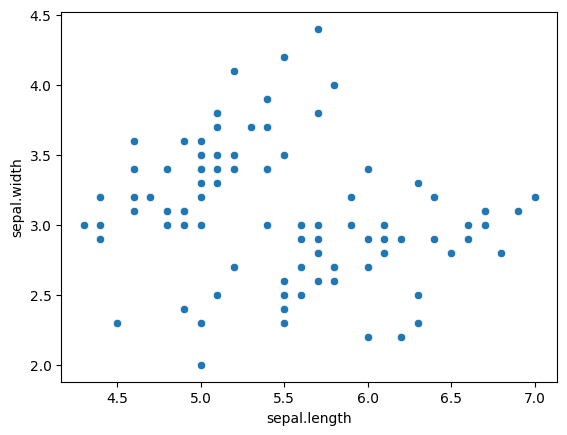

In [199]:
plt.Figure(figsize=(8,8))
sns.scatterplot(data=filtered_df, x="sepal.length", y="sepal.width")
plt.show()

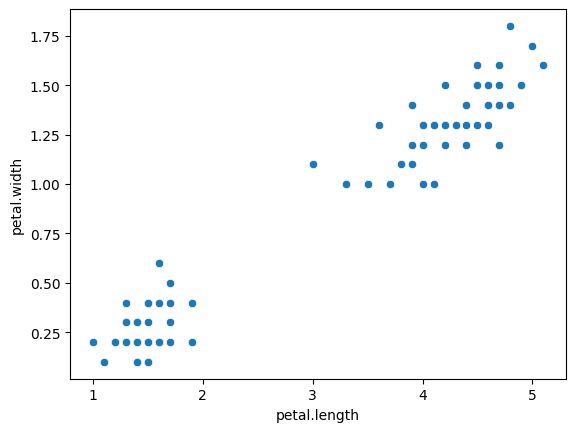

In [200]:
plt.Figure(figsize=(8,8))
sns.scatterplot(data=filtered_df, x="petal.length", y="petal.width")
plt.show()

In [201]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

numerical_features=filtered_df.select_dtypes(include='float')
target_features=filtered_df['variety']


preprocess=ColumnTransformer(transformers=
                             [
                                 ('StandardScaler',StandardScaler(),numerical_features),
                                 
                             ])

In [202]:
std = StandardScaler()

In [203]:
preprocess

,transformers,"[('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [204]:
from sklearn.model_selection import train_test_split

X=filtered_df.drop('variety',axis=1)
y=filtered_df['variety']
le = LabelEncoder()
y = le.fit_transform(y)
X_scaled = std.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [205]:
X_train

array([[ 3.58663321e-01, -6.27704002e-01,  1.13639313e+00,
         9.14069966e-01],
       [ 2.02041783e-01, -2.07835104e-01,  8.59054966e-01,
         9.14069966e-01],
       [-7.37687441e-01,  6.31902691e-01, -8.74308565e-01,
        -6.86441647e-01],
       [-1.67741667e+00,  2.12033793e-01, -1.08231219e+00,
        -1.04211089e+00],
       [ 2.02041783e-01, -1.25750735e+00,  7.20385883e-01,
         5.58400718e-01],
       [ 3.58663321e-01,  2.73124718e+00, -9.43643106e-01,
        -6.86441647e-01],
       [-7.37687441e-01,  8.41837140e-01, -1.08231219e+00,
        -8.64276271e-01],
       [ 3.58663321e-01, -4.17769553e-01,  9.28389507e-01,
         9.14069966e-01],
       [-8.94308978e-01,  2.09934449e-03, -9.43643106e-01,
        -1.21994552e+00],
       [ 1.29839254e+00, -1.25750735e+00,  1.41373130e+00,
         1.26973921e+00],
       [-1.05093052e+00,  6.31902691e-01, -8.74308565e-01,
        -1.04211089e+00],
       [-1.36417359e+00,  2.12033793e-01, -1.01297765e+00,
      

In [206]:
X_train.shape

(80, 4)

In [207]:
print(f'X_train:{X_train.shape},y_train:{y_train.shape},x_test:{X_test.shape},y_test:{y_test.shape}')

X_train:(80, 4),y_train:(80,),x_test:(20, 4),y_test:(20,)


In [208]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [209]:
X_scaled

array([[-5.81065904e-01,  8.41837140e-01, -1.01297765e+00,
        -1.04211089e+00],
       [-8.94308978e-01, -2.07835104e-01, -1.01297765e+00,
        -1.04211089e+00],
       [-1.20755205e+00,  2.12033793e-01, -1.08231219e+00,
        -1.04211089e+00],
       [-1.36417359e+00,  2.09934449e-03, -9.43643106e-01,
        -1.04211089e+00],
       [-7.37687441e-01,  1.05177159e+00, -1.01297765e+00,
        -1.04211089e+00],
       [-1.11201292e-01,  1.68157493e+00, -8.04974023e-01,
        -6.86441647e-01],
       [-1.36417359e+00,  6.31902691e-01, -1.01297765e+00,
        -8.64276271e-01],
       [-7.37687441e-01,  6.31902691e-01, -9.43643106e-01,
        -1.04211089e+00],
       [-1.67741667e+00, -4.17769553e-01, -1.01297765e+00,
        -1.04211089e+00],
       [-8.94308978e-01,  2.09934449e-03, -9.43643106e-01,
        -1.21994552e+00],
       [-1.11201292e-01,  1.26170604e+00, -9.43643106e-01,
        -1.04211089e+00],
       [-1.05093052e+00,  6.31902691e-01, -8.74308565e-01,
      

## Deep Learning

In [210]:
# Deep Learning

model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(4,), activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train, y_train, epochs=100)



Epoch 1/100


c:\Users\Dharm\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9250 - loss: 0.4780 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9250 - loss: 0.4744 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.4709 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.4674 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.4639 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9375 - loss: 0.4604
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.4570 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.4537 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.4503 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 0.4469 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9375 - loss: 0.4436
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.4404 


In [211]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.2240


[0.22397689521312714, 1.0]

In [212]:
y_predicted = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [213]:
y_predicted[3]

array([0.2541682], dtype=float32)

In [214]:
import pickle

# Save the model using pickle
with open("iris_model_DL.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as iris_model.pkl")

# -----------------------------
# Load the model back
with open("iris_model_DL.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test prediction
sample = X_test[0].reshape(1, -1)  # example input
print("Predicted:", loaded_model.predict(sample))


Model saved as iris_model.pkl


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted: [[0.87531084]]


In [215]:
# # Save model safely with TensorFlow (recommended)
# model.save("iris_model_DL.h5")

# # Load it back
# from tensorflow.keras.models import load_model
# loaded_model = load_model("iris_model_DL.h5")


## Machine Learning


In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load and filter data (your original code)
df = pd.read_csv(r"R:\DataScience_Aug_2025\DeepLearning\Artifacts\iris.csv")
df = pd.DataFrame(df)
filtered_df = df[(df['variety'] == 'Setosa') | (df['variety'] == 'Versicolor')]

# Features and target
X = filtered_df.drop('variety', axis=1)
y = filtered_df['variety']

# Encode the target (convert strings to 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split (using encoded y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Corrected Preprocessor: Scale numerical features only
num_features = X.columns.tolist()  # ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
preprocess = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), num_features)
])

# Pipeline
pipe_for_logi = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression())
])

# Fit the pipeline (this should now work without errors)
pipe_for_logi.fit(X_train, y_train)

# Optional: Predict and evaluate (e.g., on test set)
y_pred = pipe_for_logi.predict(X_test)
print("Predictions:", y_pred)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Predictions: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Accuracy: 1.0


In [217]:
import pickle

In [218]:
with open('iris flower ML.pkl',"wb") as file:
    pickle.dump(pipe_for_logi,file)

In [219]:
# with open(r"R:\DATA SCIENCE\Dharmarajan\IRIS FLOWER PREDICTION CLASSIFICATION\iris flower.pkl",'rb') as f:
#     pipe_for_logi =pickle.load(f)

# print(pipe_for_logi.predict(X_test))